In [ ]:
# Author: Janssen Kotah
# snRNAseq analysis for WT/SHIP1 KO mice as part of Matera et al. project
# CellChat analysis based on package vignette: https://github.com/sqjin/CellChat


In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(CellChat)

Warning message:
“package ‘Seurat’ was built under R version 4.1.3”
The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph

Warning message:
“package ‘igraph’ was built under R version 4.1.3”

Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
cells <- readRDS("../04. Analysis_resequencing_2/003E1_final_cells_annotated.rds")


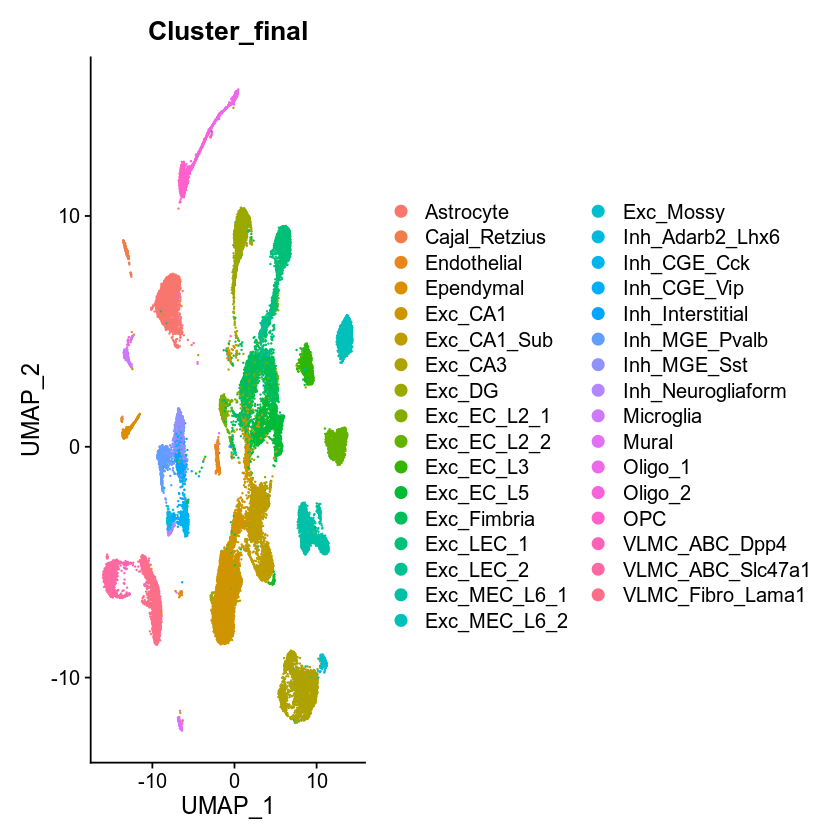

In [3]:
DimPlot(cells, group.by = "Cluster_final")

In [4]:
# do WT and KO separately, then combine
seu_KO = subset(cells, Genotype == "KO")
seu_KO

An object of class Seurat 
24356 features across 20315 samples within 1 assay 
Active assay: RNA (24356 features, 2062 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [5]:
Idents(seu_KO) = "Cluster_final"
seu_KO$Cluster_final %>%  table()

.
        Astrocyte     Cajal_Retzius       Endothelial         Ependymal 
             1982               307               118               350 
          Exc_CA1       Exc_CA1_Sub           Exc_CA3            Exc_DG 
             2641              1031              1335              1332 
      Exc_EC_L2_1       Exc_EC_L2_2         Exc_EC_L3         Exc_EC_L5 
              248               413               394               813 
      Exc_Fimbria         Exc_LEC_1         Exc_LEC_2      Exc_MEC_L6_1 
             1842               766               104               915 
     Exc_MEC_L6_2         Exc_Mossy   Inh_Adarb2_Lhx6       Inh_CGE_Cck 
              439               100                93               233 
      Inh_CGE_Vip  Inh_Interstitial     Inh_MGE_Pvalb       Inh_MGE_Sst 
               72               530               351               335 
Inh_Neurogliaform         Microglia             Mural           Oligo_1 
               83               223              

In [6]:
seu_KO <- NormalizeData(seu_KO)
data.input <- GetAssayData(seu_KO, assay = "RNA", slot = "data") # normalized data matrix

In [7]:
meta = data.frame(labels = seu_KO@meta.data$Cluster_final, row.names = colnames(seu_KO))
unique(rownames(meta)) %>% length()

[1] 20315

In [8]:
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "labels")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Astrocyte Cajal_Retzius Endothelial Ependymal Exc_CA1 Exc_CA1_Sub Exc_CA3 Exc_DG Exc_EC_L2_1 Exc_EC_L2_2 Exc_EC_L3 Exc_EC_L5 Exc_Fimbria Exc_LEC_1 Exc_LEC_2 Exc_MEC_L6_1 Exc_MEC_L6_2 Exc_Mossy Inh_Adarb2_Lhx6 Inh_CGE_Cck Inh_CGE_Vip Inh_Interstitial Inh_MGE_Pvalb Inh_MGE_Sst Inh_Neurogliaform Microglia Mural Oligo_1 Oligo_2 OPC VLMC_ABC_Dpp4 VLMC_ABC_Slc47a1 VLMC_Fibro_Lama1 


In [9]:
levels(cellchat@idents)
groupSize <- as.numeric(table(cellchat@idents))
groupSize

[1] "Astrocyte"         "Cajal_Retzius"     "Endothelial"      
 [4] "Ependymal"         "Exc_CA1"           "Exc_CA1_Sub"      
 [7] "Exc_CA3"           "Exc_DG"            "Exc_EC_L2_1"      
[10] "Exc_EC_L2_2"       "Exc_EC_L3"         "Exc_EC_L5"        
[13] "Exc_Fimbria"       "Exc_LEC_1"         "Exc_LEC_2"        
[16] "Exc_MEC_L6_1"      "Exc_MEC_L6_2"      "Exc_Mossy"        
[19] "Inh_Adarb2_Lhx6"   "Inh_CGE_Cck"       "Inh_CGE_Vip"      
[22] "Inh_Interstitial"  "Inh_MGE_Pvalb"     "Inh_MGE_Sst"      
[25] "Inh_Neurogliaform" "Microglia"         "Mural"            
[28] "Oligo_1"           "Oligo_2"           "OPC"              
[31] "VLMC_ABC_Dpp4"     "VLMC_ABC_Slc47a1"  "VLMC_Fibro_Lama1"

[1] 1982  307  118  350 2641 1031 1335 1332  248  413  394  813 1842  766  104
[16]  915  439  100   93  233   72  530  351  335   83  223  147  280  236  614
[31]   50  643 1295

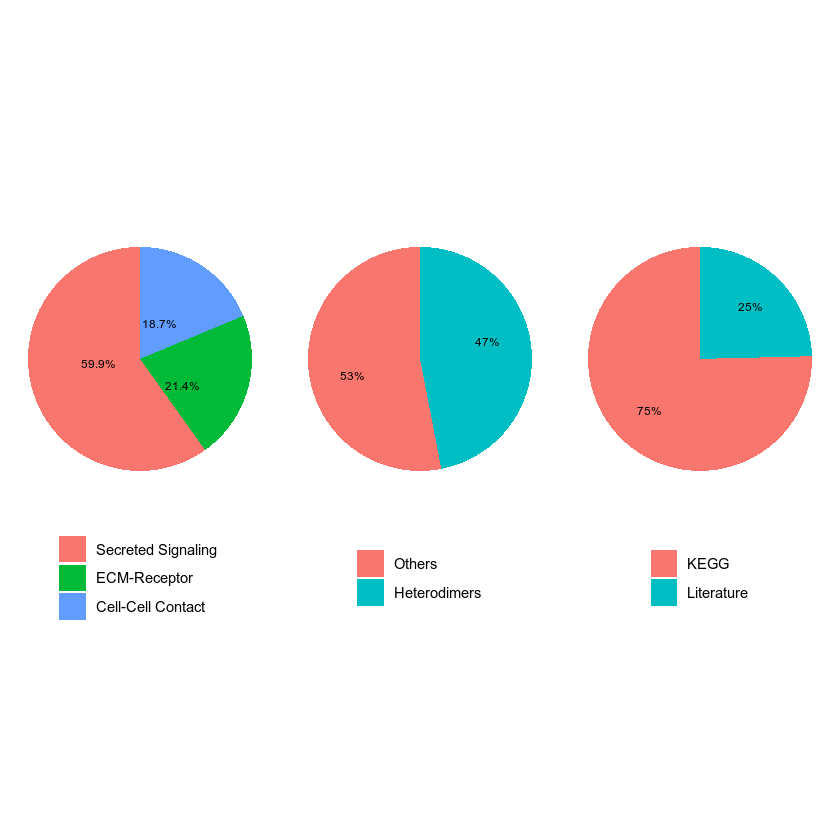

In [10]:
CellChatDB <- CellChatDB.mouse
showDatabaseCategory(CellChatDB)

In [12]:
# remove two interaction terms that had errors/warnings,
# solution is from github.com/sqjin/CellChat/issues/45
which(CellChatDB[["interaction"]]$ligand == "H2-BI")
CellChatDB[["interaction"]] <- CellChatDB[["interaction"]][-1887,]


[1] 1887

In [14]:
which(CellChatDB[["interaction"]]$ligand == "H2-Ea-ps")
CellChatDB[["interaction"]] <- CellChatDB[["interaction"]][-1900,]


[1] 1900

In [15]:
cellchat@DB <- CellChatDB

In [16]:
print(Sys.time())
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

[1] "2024-03-06 22:36:08 CET"


In [17]:
print(Sys.time())
cellchat <- projectData(cellchat, PPI.mouse)
cellchat <- computeCommunProb(cellchat)

[1] "2024-03-06 22:39:30 CET"
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-03-06 22:39:43]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-03-06 22:50:02]"


In [18]:
print(Sys.time())
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)


[1] "2024-03-06 22:50:02 CET"


In [22]:
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

saveRDS(cellchat, "001B_CellChat_all_clusters_KO.rds")